# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. The statsmodels version used in the development of this course is 0.9.0.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>

Let's walk through a very simple example of using statsmodels!

### Perform standard imports and load the dataset
For these exercises we'll be using a statsmodels built-in macroeconomics dataset:

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('macrodata.csv',index_col = 0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Plot the dataset

<Axes: ylabel='REAL GDP'>

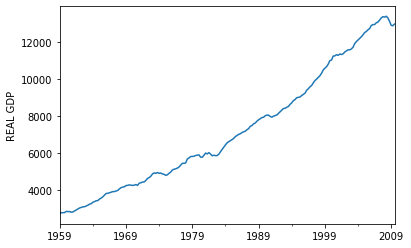

In [7]:
df['realgdp'].plot(ylabel = 'REAL GDP')

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [8]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [9]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

We see from these numbers that for the period from <strong>1960-09-30</strong> to <strong>1965-06-30</strong> actual values fall below the trendline.

In [10]:
type(gdp_cycle)

pandas.core.series.Series

In [11]:
df['trend'] = gdp_trend

<Axes: >

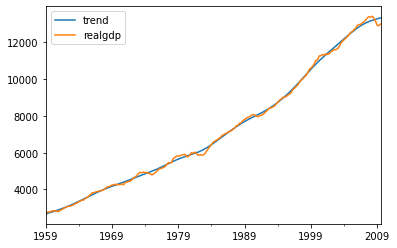

In [12]:
df[['trend','realgdp']].plot()

<Axes: >

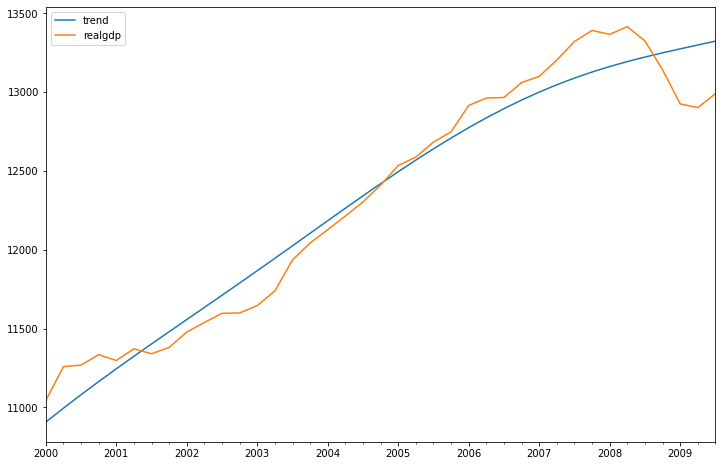

In [14]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8))

## SLSU Board Exams

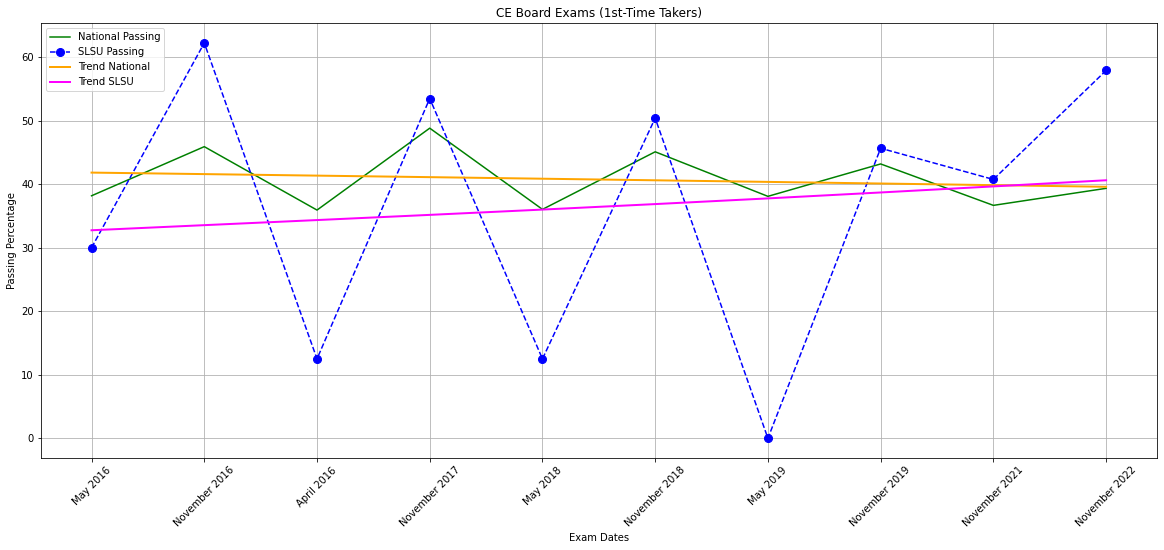

In [38]:
# Civil Engineering

exam_dates = ['May 2016','November 2016','April 2016','November 2017',
              'May 2018','November 2018','May 2019','November 2019', 'November 2021', 'November 2022']

national_passing = [38.17,45.90,35.92,48.81,36.03,45.09,38.08,43.18,36.66,39.34]
slsu_passing     = [30,62.22,12.50,53.47,12.50,50.39,0,45.65,40.74,57.89]

cycle_slsu, trend_slsu = hpfilter(slsu_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)
cycle_national, trend_national = hpfilter(national_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)

# ----- 

plt.figure(figsize = (20,8))
plt.title('CE Board Exams (1st-Time Takers)')
plt.ylabel('Passing Percentage')
plt.xlabel('Exam Dates')
plt.xticks(rotation = 45)
plt.grid(True)


plt.plot(exam_dates, national_passing, color = 'green', label = 'National Passing')
plt.plot(exam_dates, slsu_passing, ls='--', marker='o', markerfacecolor='blue', markersize='8', color='blue', label = 'SLSU Passing')
plt.plot(exam_dates, trend_national, color='orange', linewidth=2, label = 'Trend National')
plt.plot(exam_dates, trend_slsu, color='magenta', linewidth=2, label = 'Trend SLSU')

plt.legend()

plt.show()

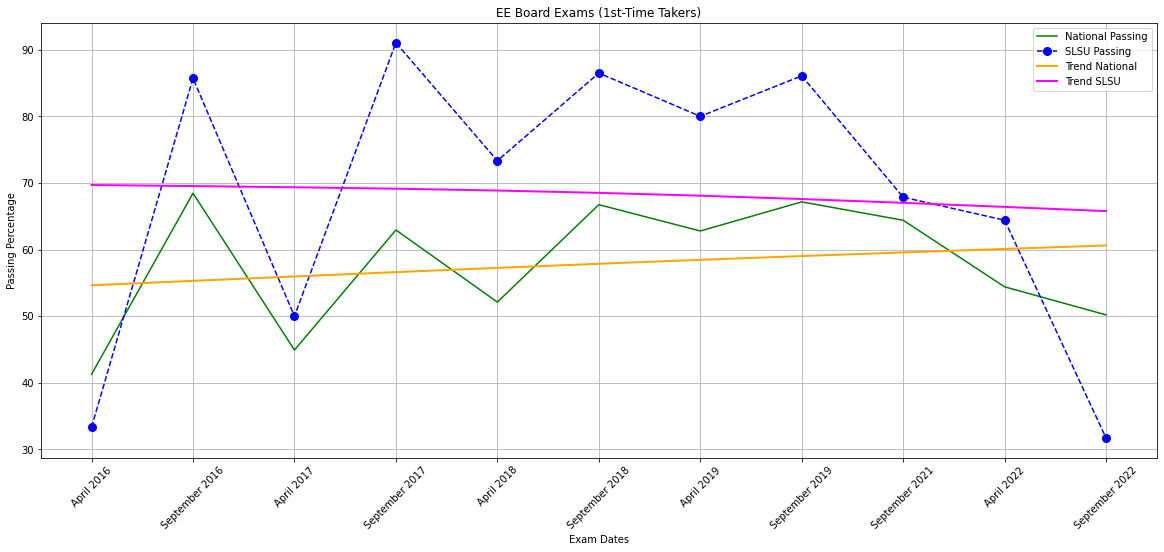

In [39]:
# Electrical Engineering

exam_dates = ['April 2016','September 2016','April 2017','September 2017',
              'April 2018','September 2018','April 2019','September 2019', 'September 2021','April 2022','September 2022']

national_passing = [41.29,68.46,44.92,62.94,52.12,66.74,62.79,67.16,64.40,54.41,50.20]
slsu_passing     = [33.33,85.71,50,91.04,73.33,86.49,80,86.07,67.86,64.41,31.71]

cycle_slsu, trend_slsu = hpfilter(slsu_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)
cycle_national, trend_national = hpfilter(national_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)

plt.figure(figsize = (20,8))
plt.title('EE Board Exams (1st-Time Takers)')
plt.ylabel('Passing Percentage')
plt.xlabel('Exam Dates')
plt.xticks(rotation = 45)
plt.grid(True)


plt.plot(exam_dates, national_passing, color = 'green', label = 'National Passing')
plt.plot(exam_dates, slsu_passing, ls='--', marker='o', markerfacecolor='blue', markersize='8', color='blue', label = 'SLSU Passing')
plt.plot(exam_dates, trend_national, color='orange', linewidth=2, label = 'Trend National')
plt.plot(exam_dates, trend_slsu, color='magenta', linewidth=2, label = 'Trend SLSU')

plt.legend()

plt.show()

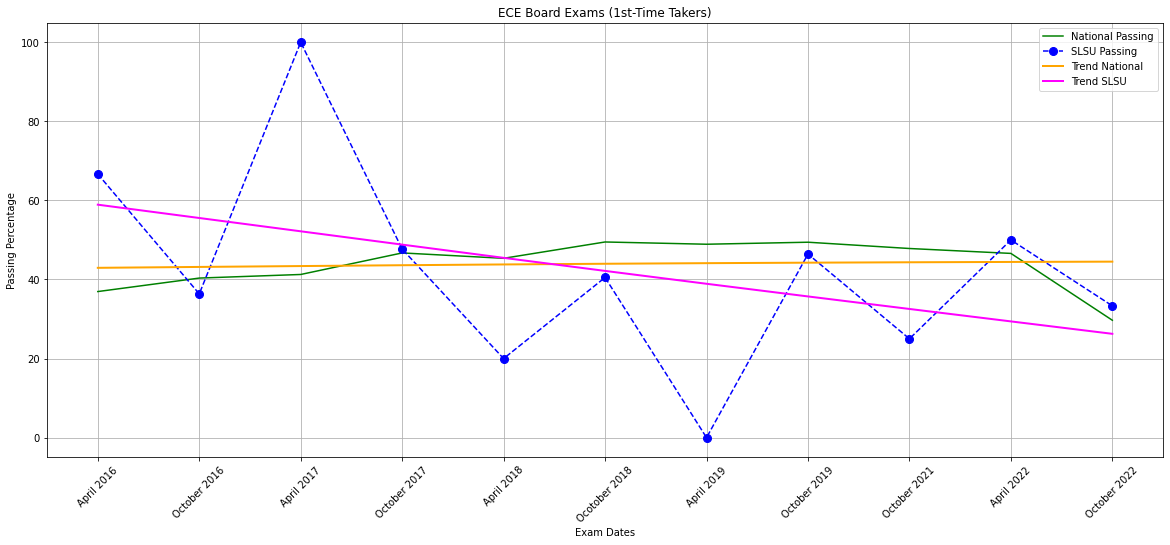

In [41]:
# Electronics Engineering

exam_dates = ['April 2016','October 2016','April 2017','October 2017',
              'April 2018','Ocotober 2018','April 2019','October 2019','October 2021','April 2022','October 2022']

national_passing = [36.95,40.36,41.27,46.72,45.36,49.49,48.92,49.43,47.84,46.60,29.69]
slsu_passing     = [66.67,36.36,100,47.69,20,40.51,0,46.43,25,50,33.33]

cycle_slsu, trend_slsu = hpfilter(slsu_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)
cycle_national, trend_national = hpfilter(national_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)

# ----

plt.figure(figsize = (20,8))
plt.title('ECE Board Exams (1st-Time Takers)')
plt.ylabel('Passing Percentage')
plt.xlabel('Exam Dates')
plt.xticks(rotation = 45)
plt.grid(True)


plt.plot(exam_dates, national_passing, color = 'green', label = 'National Passing')
plt.plot(exam_dates, slsu_passing, ls='--', marker='o', markerfacecolor='blue', markersize='8', color='blue', label = 'SLSU Passing')
plt.plot(exam_dates, trend_national, color='orange', linewidth=2, label = 'Trend National')
plt.plot(exam_dates, trend_slsu, color='magenta', linewidth=2, label = 'Trend SLSU')

plt.legend()

plt.show()

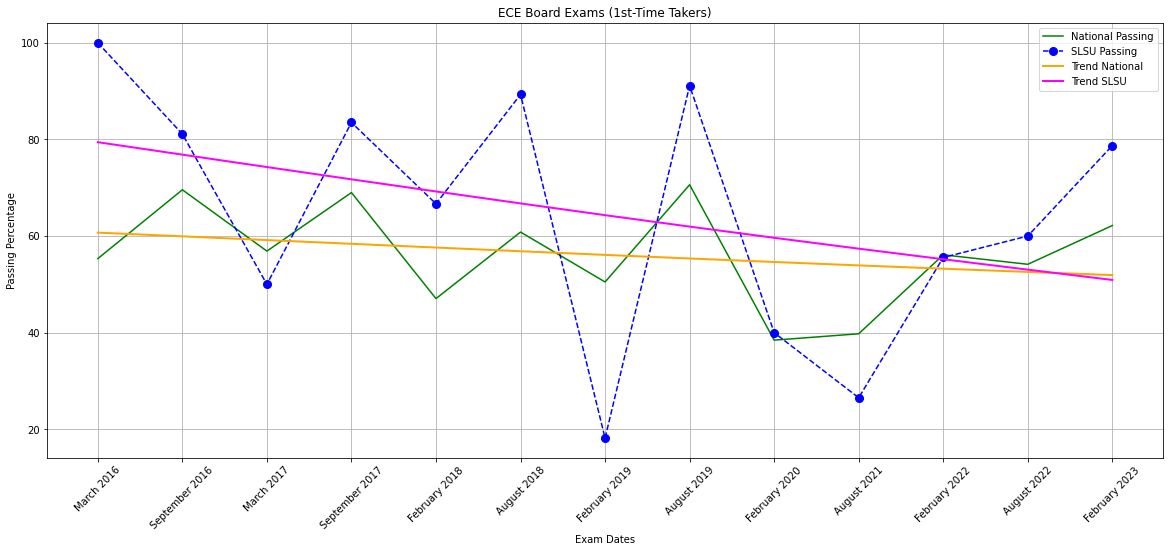

In [42]:
# Mechanical Engineering

exam_dates = ['March 2016','September 2016','March 2017','September 2017',
              'February 2018','August 2018','February 2019','August 2019','February 2020','August 2021','February 2022','August 2022',
              'February 2023']

national_passing = [55.32,69.57,56.88,68.99,47.05,60.82,50.49,70.61,38.45,39.77,56.11,54.15,62.17]
slsu_passing     = [100,81.11,50,83.50,66.67,89.29,18.18,91.11,40,26.53,55.56,60,78.72]

cycle_slsu, trend_slsu = hpfilter(slsu_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)
cycle_national, trend_national = hpfilter(national_passing, lamb=1600) # monthly (129600), quarterly (1600), annual (6.25)

# ----

plt.figure(figsize = (20,8))
plt.title('ECE Board Exams (1st-Time Takers)')
plt.ylabel('Passing Percentage')
plt.xlabel('Exam Dates')
plt.xticks(rotation = 45)
plt.grid(True)


plt.plot(exam_dates, national_passing, color = 'green', label = 'National Passing')
plt.plot(exam_dates, slsu_passing, ls='--', marker='o', markerfacecolor='blue', markersize='8', color='blue', label = 'SLSU Passing')
plt.plot(exam_dates, trend_national, color='orange', linewidth=2, label = 'Trend National')
plt.plot(exam_dates, trend_slsu, color='magenta', linewidth=2, label = 'Trend SLSU')

plt.legend()

plt.show()